# Traffic Accidents by San Diego Community

This analysis links traffic accident records from SWITRS to San Diego planning communities to see which communityies have the most traffoc accidents. Unfortunately, the data, from the years 2014 and 2015, has very poor lat/lon values -- most records have none -- so the number of records that can be linked into communities is too small for a worthwhile answer 


In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from shapely.geometry import Point

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
pkg.resource('collisions')

Header,Type,Description
case_id,integer,
accident_year,integer,
proc_date,string,
juris,string,
collision_date,integer,
collision_time,integer,
officer_id,string,
reporting_district,string,
day_of_week,integer,
chp_shift,integer,


In [4]:
col = pkg.resource('collisions').read_csv()


In [5]:
col_sd = col[col.juris.isin( ['3711','3714','3797', '3725'] )]
len(col_sd)

8919

In [6]:

## Create a new GeoPandas frame, converting the targetlongitude and targetlatitude
## colums to a Shapely Point and assigning it to the frame's geometry

t = col_sd.dropna(subset=['longitude', 'latitude'])

gdf = gpd.GeoDataFrame(t, geometry=
                        [Point(x,y) for x,y in zip(-t.longitude, t.latitude) ])

len(gdf),len(col_sd)

(106, 8919)

There are only 106 records with valid lat/lon, out of the original 8919, which is a pretty poort sample. Let's plot those points over a map of the county to see where they are. 

In [7]:
len(col)

838430

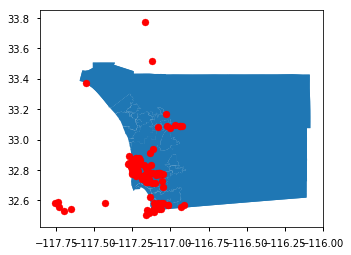

In [8]:
comm  = pkg.reference('communities').geoframe()
ax = comm.plot()
gdf.plot(ax=ax, color='red')

Not only are there only 106 valid points, but a lot of the points are in crazy places, outside of the city, outside of the county, and in the ocean. 

In [9]:
comm = pkg.reference('communities').geoframe()
comm.head()

,type,name,code,geometry
0,city,S.D. COUNTY,CN,POLYGON ((-117.0621375932527 33.10639472033611...
1,city,S.D. COUNTY,CN,POLYGON ((-117.0907852966509 33.10383120924283...
2,city,S.D. COUNTY,CN,"POLYGON ((-117.0990424203171 33.0964088949934,..."
3,city,S.D. COUNTY,CN,POLYGON ((-117.0849619730666 33.15525092251055...
4,city,S.D. COUNTY,CN,POLYGON ((-117.1017275485357 33.15262701224363...


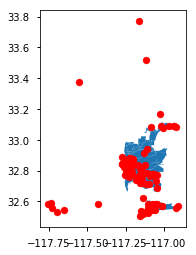

In [10]:
sd_comm = comm[ comm['type'] == 'sd_community']
ax = sd_comm.plot()
gdf.plot(ax=ax, color='red')

Spatially join the accident points with the communities. 

In [11]:
j = gpd.sjoin(gdf.dropna(subset=['geometry']), sd_comm)
sum(j.code.notnull())

84

Out of the small number with real points, only 84 of them link to a community in San Diego, we can get an answer, but it will not be a good one. 

In [12]:
j.groupby('name').count().case_id.sort_values(ascending=False)

name
LA JOLLA                               12
COLLEGE AREA                           10
UNIVERSITY                              7
PACIFIC BEACH                           6
MISSION VALLEY                          6
MISSION BAY PARK                        6
CLAIREMONT MESA                         5
SAN PASQUAL                             5
TIJUANA RIVER VALLEY                    4
OTAY MESA-NESTOR                        3
KEARNY MESA                             3
DOWNTOWN                                2
ENCANTO NEIGHBORHOODS,SOUTHEASTERN      2
MIRA MESA                               2
MISSION BEACH                           2
OTAY MESA                               2
BALBOA PARK                             2
LINDA VISTA                             1
MID-CITY:KENSINGTON-TALMADGE            1
MILITARY FACILITIES                     1
SKYLINE-PARADISE HILLS                  1
SOUTHEASTERN SAN DIEGO,SOUTHEASTERN     1
Name: case_id, dtype: int64

In [13]:
col.head().T

,0,1,2,3,4
case_id,5816493,5816498,5816553,5816557,5912009
accident_year,2014,2014,2014,2014,2014
proc_date,20140730,20140303,20140531,20140530,20151221
juris,1502,5606,1942,1948,3010
collision_date,20140523,20140104,20140519,20140417,20140101
collision_time,2138,1926,900,755,238
officer_id,00001,00001,33260,20767,1208
reporting_district,NaN,NaN,123,NaN,339
day_of_week,5,6,1,4,3
chp_shift,5,5,5,5,5


In [14]:
# SD County
col_sdc = col[ ( (col.juris.str.startswith('37')) |  (col.juris == '9645'))] # 9645 is CHP in San Diego City
len(col_sdc)

35048

In [15]:
col_sdc.juris.value_counts().sort_index()


3700     3829
3701     1254
3702     2360
3703      376
3705     1252
3706     1468
3708      522
3709      652
3710     2229
3711     8919
9645    12187
Name: juris, dtype: int64

What's interesting here is that there are a lot of city codes that are in the jurisdiction documentation that aren't in this set: 3780 Poway, 3720 Lemon grove. From the look for the documentation, these values might be mapped to 3700. 

In [16]:
col[col.juris == '3720']

,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,reporting_district,day_of_week,chp_shift,...,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude


In [17]:
pkg.resource('sd_juris')

Header,Type,Description
code,integer,
name,string,
alt_code,string,
population,integer,
area,integer,
road_miles,float,
daily_vmt,float,


In [18]:
juris = pkg.resource('sd_juris').read_csv()
#juris['code'] = juris.code.astype('str')

In [19]:
t = col_sdc.merge(juris, left_on='cnty_city_loc', right_on='code')
df = t.groupby('name').count().case_id.sort_values(ascending=False).to_frame()
df.columns = ['accidents']
df = df.join(juris.set_index('name'))
df['area'] = df.area / 1_000_000 # sq meters to sq km

# Rate by area and population 
df['area_rate'] = df.accidents / df.area
df['pop_rate'] = df.accidents / df.population * 100_000
df['dvmt_rate'] = df.accidents / df.daily_vmt
df['road_rate'] = df.accidents / df.road_miles

df.sort_values('pop_rate', ascending=False)

,accidents,code,alt_code,population,area,road_miles,daily_vmt,area_rate,pop_rate,dvmt_rate,road_rate
name,,,,,,,,,,,
National City,1221,3709,NaN,60349.0,18.853103,104.630,486.121,64.763875,2023.231537,2.511720,11.669693
Coronado,394,3703,NaN,24852.0,20.541298,52.389,97.363,19.180872,1585.385482,4.046712,7.520663
Del Mar,67,3704,3700.0,4312.0,4.420546,24.414,125.989,15.156499,1553.803340,0.531792,2.744327
San Diego,19465,3711,NaN,1374812.0,842.252395,2994.117,12693.780,23.110650,1415.829946,1.533428,6.501082
Vista,1375,3713,3700.0,98560.0,48.380231,171.362,916.330,28.420699,1395.089286,1.500551,8.023949
Oceanside,2229,3710,NaN,173829.0,106.841893,445.774,1457.029,20.862603,1282.294669,1.529825,5.000292
El Cajon,1252,3705,NaN,102894.0,37.516310,190.583,895.714,33.372152,1216.786207,1.397768,6.569316
Chula Vista,3024,3702,NaN,260598.0,128.544440,483.037,2412.366,23.524938,1160.407985,1.253541,6.260390
Carlsbad,1254,3701,NaN,112008.0,97.713477,340.163,1982.123,12.833440,1119.562888,0.632655,3.686468


In [20]:
from tabulate import tabulate
print(tabulate(df[['accidents','area_rate','pop_rate']], headers='keys', tablefmt='pipe'))

| name             |   accidents |   area_rate |   pop_rate |
|:-----------------|------------:|------------:|-----------:|
| San Diego        |       19465 |    23.1106  |  1415.83   |
| Chula Vista      |        3024 |    23.5249  |  1160.41   |
| Oceanside        |        2229 |    20.8626  |  1282.29   |
| Escondido        |        1468 |    15.2893  |   979.241  |
| Vista            |        1375 |    28.4207  |  1395.09   |
| Carlsbad         |        1254 |    12.8334  |  1119.56   |
| El Cajon         |        1252 |    33.3722  |  1216.79   |
| National City    |        1221 |    64.7639  |  2023.23   |
| San Marcos       |         703 |    11.1401  |   768.482  |
| Encinitas        |         530 |    10.878   |   852.638  |
| La Mesa          |         522 |    22.1635  |   882.875  |
| Santee           |         412 |     9.79591 |   724.854  |
| Poway            |         400 |     3.95201 |   805.234  |
| Coronado         |         394 |    19.1809  |  1585.39   |
| San Di

In [22]:
from tabulate import tabulate
print(tabulate(df[['dvmt_rate', 'road_rate']].sort_values('road_rate', ascending=False), headers='keys', tablefmt='pipe'))

| name             |   dvmt_rate |   road_rate |
|:-----------------|------------:|------------:|
| National City    |  2.51172    |  11.6697    |
| Vista            |  1.50055    |   8.02395   |
| Coronado         |  4.04671    |   7.52066   |
| El Cajon         |  1.39777    |   6.56932   |
| San Diego        |  1.53343    |   6.50108   |
| Chula Vista      |  1.25354    |   6.26039   |
| Oceanside        |  1.52983    |   5.00029   |
| Escondido        |  1.04965    |   4.39609   |
| San Marcos       |  0.82492    |   3.99339   |
| Carlsbad         |  0.632655   |   3.68647   |
| La Mesa          |  0.83269    |   3.48544   |
| Santee           |  0.921506   |   3.46367   |
| Imperial Beach   |  1.75136    |   3.39073   |
| Encinitas        |  0.638869   |   3.16724   |
| Del Mar          |  0.531792   |   2.74433   |
| Poway            |  0.500138   |   2.34567   |
| Solana Beach     |  0.49642    |   1.66796   |
| Lemon Grove      |  0.29348    |   1.16952   |
| San Diego County |